In [50]:
import sys
sys.path.append('../src/')
from tqdm import tqdm
import pandas as pd
import wandb
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [51]:
api = wandb.Api()
entity, project = "ajzero", "AlphaZero"
tags = ['2024-04-26-15-30-10', '2024-04-25-19-54-41', '2024-04-25-21-23-45', '2024-04-26-09-48-53','2024-04-26-11-22-32', '2024-05-01-11-32-26']
filters = {"tags": {"$in": tags}, "state": "finished", "config.use_visit_count": True, "config.planning_budget": 128}
runs = api.runs(entity + "/" + project, filters=filters)
runs


<Runs ajzero/AlphaZero>

In [52]:
data = []
for run in tqdm(runs):
    summary = run.summary._json_dict
    config = run.config
    summary.update(config)
    data.append(summary)

df = pd.DataFrame(data)

# filter out runs with Evaluation/Mean_Returns == -100
df = df[df['Evaluation/Mean_Returns'] != -100]
df

100%|██████████| 30/30 [00:00<00:00, 57482.47it/s]


,Self_Play/Discounted_Return,Self_Play/Mean_Timesteps,Training/Policy_loss,Self_Play/Timesteps,Self_Play/Max_Return,Evaluation/Mean_Returns,Evaluation/Entropies,Self_Play/EMA_Discounted_Return,Self_Play/Mean_Return,Self_Play/Min_Return,...,policy_loss_weight,sample_batch_ratio,tree_value_transform,observation_embedding,regularization_weight,root_selection_policy,episodes_per_iteration,tree_evaluation_policy,replay_buffer_multiplier,selection_value_transform
0,"{'values': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",13.000000,0.786703,"{'_type': 'histogram', 'values': [0, 0, 0, 0, ...",-13,-13,"{'_type': 'histogram', 'bins': [-0.49999973177...",-13.349960,-13.000000,-13,...,0.3,4,identity,coordinate,0.000001,PolicyPUCT,6,mvc,15,identity
1,"{'values': [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",21.833333,0.909509,"{'_type': 'histogram', 'bins': [17, 17.15625, ...",-17,-15,"{'_type': 'histogram', 'bins': [-0.18771907687...",-19.631951,-21.833334,-27,...,0.3,4,identity,coordinate,0.000001,PUCT,6,mvc,15,identity
2,"{'_type': 'histogram', 'bins': [-29, -28.84375...",22.333333,1.101363,"{'bins': [19, 19.15625, 19.3125, 19.46875, 19....",-19,-17,"{'bins': [-0.17548978328704834, -0.15986478328...",-25.568325,-22.333334,-29,...,0.3,4,identity,coordinate,0.000001,PUCT,6,visit,15,identity
3,"{'bins': [-13.5, -13.484375, -13.46875, -13.45...",13.000000,0.975285,"{'_type': 'histogram', 'bins': [12.5, 12.51562...",-13,-13,"{'_type': 'histogram', 'bins': [-0.49999976158...",-13.567890,-13.000000,-13,...,0.3,4,identity,coordinate,0.000001,PolicyPUCT,6,mvc,15,identity
4,"{'_type': 'histogram', 'bins': [-21, -20.9375,...",19.333333,1.148440,"{'values': [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",-17,-17,"{'_type': 'histogram', 'bins': [-0.24945974349...",-23.601370,-19.333334,-21,...,0.3,4,identity,coordinate,0.000001,PUCT,6,mvc,15,identity
5,"{'values': [2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",20.833333,1.122971,"{'_type': 'histogram', 'bins': [19, 19.0625, 1...",-19,-19,"{'values': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",-28.650778,-20.833334,-23,...,0.3,4,identity,coordinate,0.000001,PUCT,6,visit,15,identity
6,"{'_type': 'histogram', 'values': [0, 0, 0, 0, ...",13.000000,0.894949,"{'_type': 'histogram', 'bins': [12.5, 12.51562...",-13,-13,"{'_type': 'histogram', 'bins': [-0.49999916553...",-13.328320,-13.000000,-13,...,0.3,4,identity,coordinate,0.000001,PolicyPUCT,6,mvc,15,identity
7,"{'values': [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",18.000000,0.926185,"{'values': [4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",-17,-15,"{'_type': 'histogram', 'bins': [-0.16129145026...",-19.276919,-18.000000,-21,...,0.3,4,identity,coordinate,0.000001,PUCT,6,mvc,15,identity
8,"{'values': [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",23.833333,0.941840,"{'bins': [21, 21.125, 21.25, 21.375, 21.5, 21....",-21,-17,"{'values': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",-19.936139,-23.833334,-29,...,0.3,4,identity,coordinate,0.000001,PUCT,6,visit,15,identity
9,"{'_type': 'histogram', 'bins': [-13.5, -13.484...",13.000000,1.128555,"{'_type': 'histogram', 'values': [0, 0, 0, 0, ...",-13,-13,"{'bins': [-0.5, -0.484375, -0.46875, -0.453125...",-14.309884,-13.000000,-13,...,0.3,4,identity,coordinate,0.000001,PolicyPUCT,6,mvc,15,identity


In [53]:
df["Evaluation/Trajectories"]

0     [[60, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, ...
1     [[60, 48, 36, 37, 38, 39, 40, 41, 42, 43, 44, ...
2     [[60, 48, 36, 37, 38, 39, 40, 28, 29, 30, 31, ...
3     [[60, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, ...
4     [[60, 48, 36, 37, 38, 39, 40, 41, 42, 43, 44, ...
5     [[60, 48, 36, 37, 38, 39, 40, 28, 29, 30, 31, ...
6     [[60, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, ...
7     [[60, 48, 36, 37, 38, 39, 40, 41, 42, 43, 44, ...
8     [[60, 48, 36, 37, 38, 39, 27, 28, 29, 30, 31, ...
9     [[60, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, ...
10    [[60, 48, 36, 37, 38, 39, 40, 41, 42, 43, 44, ...
11    [[60, 48, 36, 37, 38, 26, 27, 28, 29, 30, 31, ...
12    [[60, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, ...
13    [[60, 48, 36, 37, 38, 39, 40, 41, 42, 43, 44, ...
14    [[60, 48, 36, 37, 38, 39, 40, 41, 29, 30, 31, ...
15    [[60, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, ...
16    [[60, 48, 36, 37, 38, 39, 40, 41, 42, 43, 44, ...
17    [[60, 48, 36, 24, 25, 26, 27, 28, 29, 30, 

In [54]:
df['policy_combination'] = df['tree_evaluation_policy'] + "+" + df['selection_policy']
# group the data by policy combination and extract a dict trajo = {$policy_combination: trajectories} where trajectories is a merge of all the lists in the trajectories column for each group
# Step 1: Group the DataFrame by 'policy_combination'
grouped = df.groupby('policy_combination')['Evaluation/Trajectories']

# Step 2: Aggregate the trajectories lists within each group
aggregated_trajectories = grouped.sum()

# Step 3: Convert the aggregated groups to a dictionary
trajos = aggregated_trajectories.to_dict()

trajos

{'mvc+PUCT': [[60, 48, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 59],
  [60, 48, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 33, 34, 35, 47, 59],
  [60, 48, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 59],
  [60, 48, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 59],
  [60, 48, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 59],
  [60, 48, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 59],
  [60, 48, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 59],
  [60, 48, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 59],
  [60, 48, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 59],
  [60, 48, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 59]],
 'mvc+PolicyPUCT': [[60, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
  [60, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
  [60, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
  [60, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
  [60, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
  [60, 48, 49, 50, 51, 52, 53, 54, 55, 56

In [55]:

trajectories = trajos["mvc+PolicyPUCT"]
trajectories

[[60, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
 [60, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
 [60, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
 [60, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
 [60, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
 [60, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
 [60, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
 [60, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
 [60, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
 [60, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]]

In [56]:
def obs_to_cords(state, ncols):
    row, col = divmod(state, ncols)
    return row, col

ncols, nrows = df["ncols"][0], 6
# trajectories is list of trajectories where each trajectory is list of states

visits = np.zeros((nrows, ncols), dtype = int)
for trajectory in trajectories:
    for state in trajectory:
        row, col = obs_to_cords(state, ncols = ncols)
        visits[row, col] += 1

visits

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10],
       [10,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]])

In [57]:
density = visits / visits.sum()
density

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.07692308, 0.07692308, 0.07692308, 0.07692308, 0.07692308,
        0.07692308, 0.07692308, 0.07692308, 0.07692308, 0.07692308,
        0.07692308, 0.07692308],
       [0.07692308, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ,

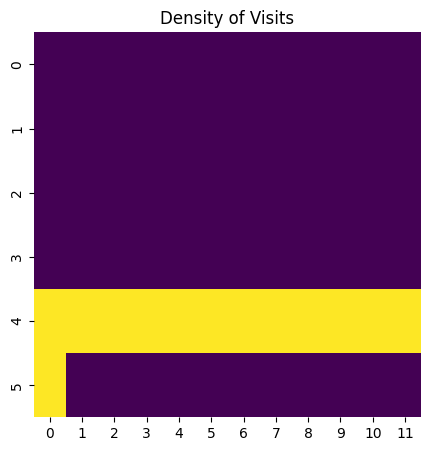

In [58]:
# render env heatmap with density
plt.figure(figsize=(5, 5))
# remove the numbers on x and y axis
sns.heatmap(density, annot=False, cmap="viridis", cbar=False)
plt.title("Density of Visits")
plt.show()

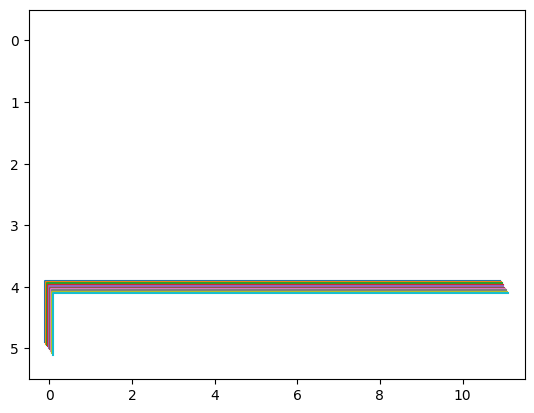

In [59]:
# Define offsets for each trajectory to reduce overlap
offsets = np.linspace(-0.1, 0.1, len(trajectories))

# Create a plot
fig, ax = plt.subplots()
ax.set_xlim(-0.5, ncols-0.5)
ax.set_ylim(-0.5, nrows-0.5)

ax.invert_yaxis()  # Invert the y-axis so the top-left is (0,0)

# Plot each trajectory with offset
for idx, (trajectory, offset) in enumerate(zip(trajectories, offsets)):
    coords = [obs_to_cords(state, ncols) for state in trajectory]
    rows, cols = zip(*coords)
    # Apply the offset
    cols = [col + offset for col in cols]
    rows = [row + offset for row in rows]
    ax.plot(cols, rows, label=f'Trajectory {idx+1}')


plt.show()

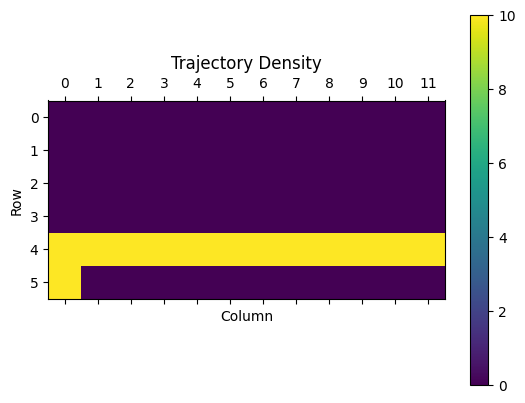

In [60]:
# Initialize the grid matrix
density = np.zeros((nrows, ncols))

# Increment the density for each state visited in each trajectory
for trajectory in trajectories:
    for state in trajectory:
        row, col = obs_to_cords(state, ncols)
        density[row, col] += 1

# Create a heatmap
fig, ax = plt.subplots()
cax = ax.matshow(density, cmap='viridis')
fig.colorbar(cax)
ax.set_xticks(range(ncols))
ax.set_yticks(range(nrows))
ax.set_xticklabels(range(ncols))
ax.set_yticklabels(range(nrows))
ax.set_xlabel('Column')
ax.set_ylabel('Row')
ax.set_title('Trajectory Density')

plt.show()

In [61]:
# plot heatmap of the density

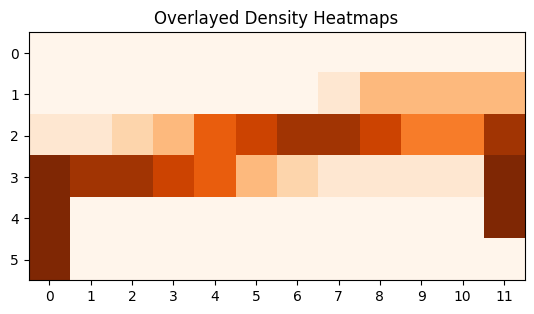

In [62]:
def calculate_density(trajectories, ncols, nrows):
    density = np.zeros((nrows, ncols))
    for trajectory in trajectories:
        for state in trajectory:
            row, col = obs_to_cords(state, ncols)
            density[row, col] += 1
    return density
fig, ax = plt.subplots()
alpha = 1.0  # Transparency level
cmaps = ['Reds', 'Blues', 'Greens', 'Oranges', 'Purples', 'Greys']
for trajectory_name in trajos.keys():
    trajectories = trajos[trajectory_name]
    density = calculate_density(trajectories, ncols, nrows)
    ax.imshow(density, cmap=cmaps.pop(), alpha=alpha)
ax.set_xticks(range(ncols))
ax.set_yticks(range(nrows))
ax.set_title('Overlayed Density Heatmaps')

plt.show()

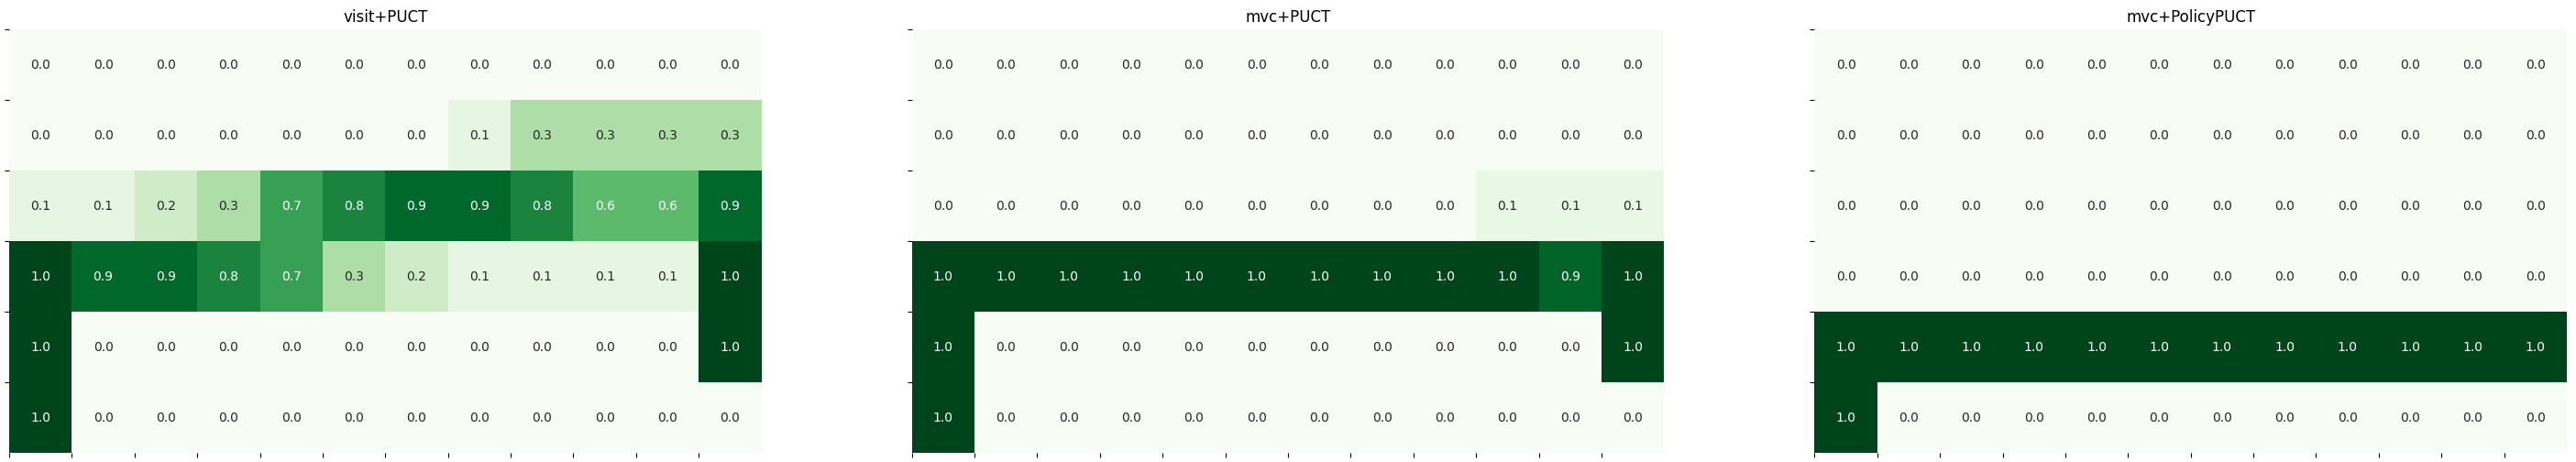

In [63]:
# create subplots where each subplot is a heatmap of the density of visits for a trajectory. use seaborn, matplotlib or any other library

heatmaps = len(trajos)

# sorted keys
keys = ['visit+PUCT', 'mvc+PUCT', 'mvc+PolicyPUCT']
fig, axs = plt.subplots(1, heatmaps, figsize=(ncols*heatmaps, nrows))
for i, key in enumerate(keys):
    trajectories = trajos[key]
    density = calculate_density(trajectories, ncols, nrows) / len(trajectories)
    sns.heatmap(density, ax=axs[i], cmap='Greens', cbar=False, annot=True, fmt='.1f')
    axs[i].set_title(key)
    axs[i].set_xticks(range(ncols))
    axs[i].set_yticks(range(nrows))

# save as svg
# plt.savefig('density_heatmaps.svg')

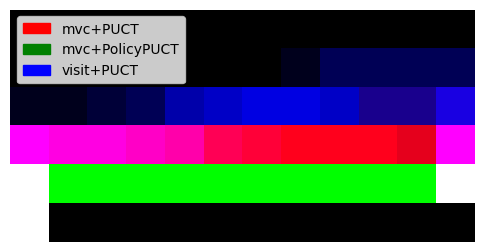

In [64]:
import matplotlib.patches as mpatches

# Initialize RGB layers
rgb_image = np.zeros((nrows, ncols, 3))  # height, width, color channels

# Map trajos keys to RGB channels
colors = ['Red', 'Green', 'Blue']
channel_colors = {name: color for name, color in zip(trajos.keys(), colors)}

# Compute density for each trajectory and assign to RGB channels
for idx, (trajectory_name, trajectories) in enumerate(trajos.items()):
    density = calculate_density(trajectories, ncols, nrows) / len(trajectories)
    norm_density = density / np.max(density)  # Normalize
    rgb_image[:, :, idx] = norm_density

# Create the plot
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(rgb_image)
ax.axis('off')  # Hide grid lines and labels

# Create a legend
legend_patches = [mpatches.Patch(color=color, label=name) for name, color in channel_colors.items()]
ax.legend(handles=legend_patches, loc='upper left')

plt.show()

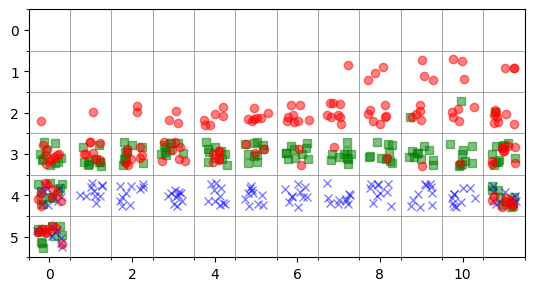

In [65]:
# Initialize the plot
fig, ax = plt.subplots()
ax.set_xlim(-0.5, ncols-0.5)
ax.set_ylim(-0.5, nrows-0.5)
ax.set_xticks(np.arange(ncols), minor=True)
ax.set_yticks(np.arange(nrows), minor=True)
ax.set_xticks(np.arange(-0.5, ncols, 1), minor=True)
ax.set_yticks(np.arange(-0.5, nrows, 1), minor=True)

# Adding grid on minor ticks at .5, 1.5, ...
ax.grid(which='minor', color='gray', linestyle='-', linewidth=0.5)

# Function to plot trajectories
def plot_swarm(trajectories, color, marker):
    for trajectory in trajectories:
        for state in trajectory:
            row, col = obs_to_cords(state, ncols)
            # Random jitter within the cell to avoid overlap
            jitter = .3
            jitter_x = np.random.uniform(-jitter, jitter)
            jitter_y = np.random.uniform(-jitter, jitter)
            ax.plot(col + jitter_x, row + jitter_y, marker=marker, color=color, alpha=0.5)

colors = ['red', 'blue', 'green']
markers = ['o', 'x', 's']
for trajectory_name in trajos.keys():
    plot_swarm(trajos[trajectory_name], colors.pop(), markers.pop())

ax.invert_yaxis()  # Invert the y-axis to match the matrix indexing
ax.set_aspect('equal')
plt.show()

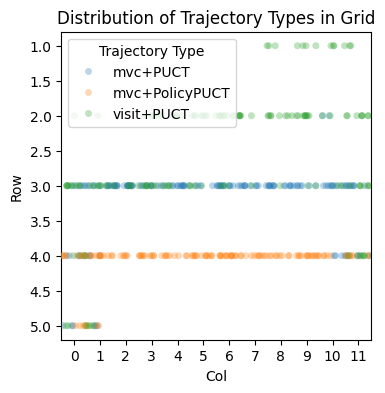

In [66]:
def obs_to_cords(state, ncols):
    row, col = divmod(state, ncols)
    return row, col


# Prepare DataFrame
data = []

for t_type, traj_list in trajos.items():
    for traj in traj_list:
        for state in traj:
            row, col = obs_to_cords(state, ncols)
            data.append({'Type': t_type, 'Row': row, 'Col': col})

df = pd.DataFrame(data)

# Plot
plt.figure(figsize=(4, 4))
sns.stripplot(data=df, x='Col', y='Row', hue='Type', jitter=1.0, dodge=False, marker='o', alpha=0.3)

plt.gca().invert_yaxis()  # Invert y-axis to align with typical matrix indexing
plt.legend(title='Trajectory Type')
plt.title('Distribution of Trajectory Types in Grid')
plt.show()